In [57]:
import nltk
import os
from gensim.models import Word2Vec as w2v
from nltk.corpus import stopwords
from nltk import word_tokenize
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gensim
import re

In [2]:
os.chdir("C:\\Users\wwwdz\OneDrive\Desktop\Spring Semester 2023\AI\FinalProject\LinkedInMatch")
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '1. Resume.ipynb',
 '2. Text Extraction.ipynb',
 '3. Train Test Split.ipynb',
 '4a. TF-IDF Vectorization.ipynb',
 '4b. BERT Vectorization.ipynb',
 '4c. Word2Vec Vectorization.ipynb',
 '4d. BagOfWords Vectorization.ipynb',
 '5a. TF-IDF Logistic Regression.ipynb',
 '5c. Word2Vec Logistic Regression.ipynb',
 '5d. BagOfWords Logistic Regression.ipynb',
 'chromedriver.exe',
 'data',
 'debug.log',
 'IBResume.ipynb',
 'Keys.py',
 'summaries.pt',
 '__pycache__']

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wwwdz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wwwdz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
def remove_stopwords(text):
    tokens = word_tokenize(text.lower())
    tokens_wo_stopwords = [t for t in tokens if t not in english_stopwords]
    text_no_stopwords = " ".join(tokens_wo_stopwords)
    return text_no_stopwords

In [10]:
train_profiles = pd.read_csv("data/X_train.csv")
test_profiles = pd.read_csv("data/X_test.csv")
train_profiles.head(5)

,Unnamed: 0,PDF,Text,Summary,Experience,Education
0,158,Natasha Devaud.pdf,\r\nContact\r\nwww.linkedin.com/in/natasha...,3D Artist/Technical Director with extensive e...,Meta. Visual Designer. January 2022 - Present...,Page 2 of 3 . ECAL - Ecole cantonale d’a...
1,137,Euna Kwon.pdf,\r\nContact\r\nwww.linkedin.com/in/iameuna...,Professional Design System designer and UI / ...,Meta. 1 year 6 months. Design system/producti...,Academy of Art University. Master of Fine Art...
2,98,Snehal Pimple.pdf,\r\nContact\r\nwww.linkedin.com/in/snehal-...,I have graduated with Master's in Electrical ...,IKEA. Data Analyst. February 2023 - Present ...,"Northeastern University. Master's degree, Mac..."
3,159,Nate Fredenburg.pdf,\r\nContact\r\nwww.linkedin.com/in/nate-\r...,tact. www.linkedin.com/in/nate-. fredenburg (...,Meta Reality Labs. 3 years. Art Director - VR...,"School of the Art Institute of Chicago. MFA, ..."
4,38,Himanshee T..pdf,\r\nContact\r\nwww.linkedin.com/in/himansh...,Adaptable data science professional with 8+ y...,Corning Incorporated. Sr Data Engineer. March...,W. P. Carey School of Business – Arizona Stat...


In [6]:
train_texts = train_profiles["Text"]
train_texts_no_stopwords = []
for text in train_texts:
    train_texts_no_stopwords.append(remove_stopwords(text))


In [7]:
test_texts = test_profiles["Text"]
test_texts_no_stopwords = []
for text in test_texts:
    test_texts_no_stopwords.append(remove_stopwords(text))

In [61]:
train_corpus = train_texts_no_stopwords
test_corpus = test_texts_no_stopwords
new_train_corpus = []
new_test_corpus = []

def removePunc(oldCorpus, newCorpus):
    for i in range(len(oldCorpus)):
        newCorpus.append(re.sub(r'[^\w\s]', '', oldCorpus[i]).split())

removePunc(train_corpus, new_train_corpus)
removePunc(test_corpus, new_test_corpus)

In [62]:
w = w2v(new_train_corpus, min_count=1, sg = 1, window=7)

emb_df = pd.DataFrame([w.wv.get_vector(str(n)) for n in w.wv.key_to_index], index = w.wv.key_to_index)

print(w.wv.most_similar('design'))
print(w.wv.most_similar('learning'))
emb_df.head()

[('visual', 0.9160350561141968), ('painting', 0.892925500869751), ('game', 0.8888452649116516), ('texture', 0.8839399218559265), ('animation', 0.8784744143486023), ('games', 0.8781793713569641), ('development', 0.8774987459182739), ('level', 0.8770291805267334), ('character', 0.8684571385383606), ('art', 0.8649177551269531)]
[('machine', 0.9611486792564392), ('advanced', 0.9452032446861267), ('statistical', 0.9451489448547363), ('artificial', 0.9436994791030884), ('deep', 0.9394423365592957), ('natural', 0.937548816204071), ('algorithms', 0.9350040555000305), ('big', 0.9344123601913452), ('vision', 0.9269294738769531), ('ai', 0.924247145652771)]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
months,-0.117378,-0.018926,0.098425,-0.239675,-0.122493,-0.899463,0.461655,0.770855,-0.172014,-0.098737,...,0.448490,0.349197,0.236929,-0.083773,0.650885,0.159816,0.096904,-0.386458,-0.069021,-0.070330
data,-0.372381,0.194367,0.062690,0.285030,-0.024765,-0.514056,-0.007404,0.532728,-0.338899,-0.399300,...,0.134854,-0.111371,0.282017,0.037073,0.143682,0.204256,-0.060264,0.056083,-0.112607,0.129979
2,-0.071082,0.080312,-0.033638,-0.374437,0.145102,-0.708412,0.306597,0.693481,-0.471485,-0.192241,...,0.241345,0.097824,-0.019092,-0.171061,0.656361,0.113597,0.265239,-0.434829,0.060330,-0.350789
1,-0.224093,0.198771,-0.005679,-0.283829,0.104181,-0.955541,0.287271,0.807517,-0.122424,-0.207969,...,0.184088,0.267347,0.177212,-0.043486,0.723891,0.091838,0.113352,-0.427979,-0.088137,-0.224648
learning,-0.443098,0.090077,-0.115938,0.121114,0.157495,-0.558259,-0.179930,0.599193,-0.113228,-0.233325,...,0.178969,-0.034422,0.363216,0.231994,0.235093,0.228063,-0.033567,0.275088,0.015024,0.412326


In [63]:
# Training on another gensim model
modelgen = gensim.models.Word2Vec(new_train_corpus, vector_size=100, window=7, min_count=2, workers=8)

# Vectorize the corpus using Word2Vec embeddings
X = []
for document in new_train_corpus:
    vectors = [modelgen.wv[token] for token in document if token in modelgen.wv]
    if vectors:
        X.append(sum(vectors) / len(vectors))
    else:
        X.append([0] * modelgen.vector_size)

for index, word in enumerate(modelgen.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(modelgen.wv.index_to_key)} is {word}")

word #0/5045 is months
word #1/5045 is data
word #2/5045 is 2
word #3/5045 is 1
word #4/5045 is learning
word #5/5045 is years
word #6/5045 is 3
word #7/5045 is page
word #8/5045 is 4
word #9/5045 is machine


[]

<Figure size 640x480 with 0 Axes>

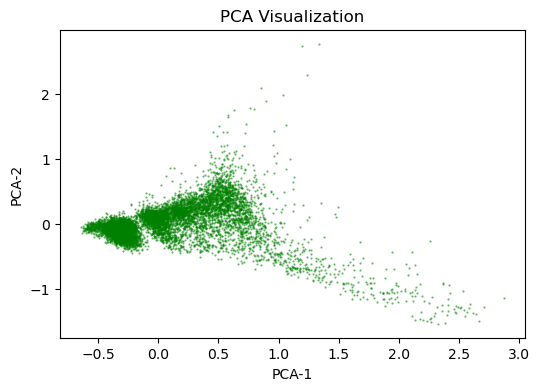

In [64]:
pca = PCA(n_components=10, random_state=7)
pca_mdl = pca.fit_transform(emb_df)
vars = ['x','y','z', 'a', 'b', 'c', 'd', 'e', 'f', 'g']
emb_df_PCA = pd.DataFrame(pca_mdl, columns=vars, index = emb_df.index)

plt.clf()
fig = plt.figure(figsize=(6,4))

#str(i) = emb_df_PCA[i] for i in vars,
plt.scatter(x = emb_df_PCA['x'], y = emb_df_PCA['y'], s = 0.4,color = 'green',alpha = 0.5)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()